<a href="https://colab.research.google.com/github/Ferchaim/Projetos-Python-M-todos-Num-ricos/blob/main/Fernando_Campos_Chaim_AritmeticaPtoFlutuanteElimGauss_alunos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Computacional 1 - Aritmética de Ponto Flutuante e Eliminação de Gauss



---




**Data de entrega:** Até 07 de Maio de 2023

**Como entregar:** Enviar o jupyter notebook (arquivo .ipynb) pelo pelo próprio Classroom.


**Leia com atenção:**


*   Você deve fazer obrigatoriamente todas as atividades marcadas com a exclamação❗.
*   Atividades marcadas com 🧩 são opcionais, mas interessantes, podendo ser desafiadoras.
*   Faça uma cópia do notebook para o seu Google Drive e use o Google Colab para executar o notebook e fazer a tarefa.
*   A atividade vai ser baseada no seu número USP para que as soluções dos alunos fiquem diferentes.
*   Há questões dissertativas!
*   Siga o passo a passo indicado no tutorial, respondendo às atividades propostas no seu jupyter notebook.
*   O notebook que entregar deve estar 100% funcional, isto é, todos os códigos rodando no Colab sem erros.
*   Você deverá entregar apenas uma cópia do jupyter notebook (.ipynb) no Classroom, na funcionalidade de "entregar" do Classroom.
*   Foi estimado um tempo total aproximado de 2-3 horas para realização completa da atividade.
*   Esta tarefa é individual e haverá controle de similaridade. Tentativas de cópias, fraude, compra-venda de EPs não serão toleradas, levando a nota zero na tarefa e posterior análise para medidas cabíveis.
*   ❗Exercício 0:❗ Para mostrar que você leu até aqui, escreva seu nome completo (assinatura) na linha a seguir:





*Assinatura:* Fernando Campos Chaim



---





Primeiro vamos carregar algumas bibliotecas: Numpy, Scipy Linear Algebra (scipy.linalg), System (sys) e Time (time)

In [ ]:
import numpy as np
import scipy.linalg as la
import sys
import time

Agora vamos definir alguns números especiais ("magic") para cada aluno, com base no seu número USP

In [ ]:
# Coloque aqui o seu número USP
nusp = 11200608

Estes números serão importantes para a atividade:

In [ ]:
magic_ilong = int(str(nusp).replace("0",""))
magic_ishort = int(str(magic_ilong)[:2])
print("magic_ilong  =", magic_ilong)
print("magic_ishort =", magic_ishort)

magic_ilong  = 11268
magic_ishort = 11




---




## Aritmética de Ponto Flutuante

Começamos esse tutorial discutindo um pouco de aritmética de ponto flutuante, que vamos definir mais adiante.



Algumas referências:

[1]https://en.wikipedia.org/wiki/IEEE_754

[2] https://betterprogramming.pub/floating-point-numbers-are-weird-in-python-heres-how-to-fix-them-51336e4ad51a

[3] https://ironpython-test.readthedocs.io/en/latest/tutorial/floatingpoint.html


A matemática está furada no computador?

In [ ]:
a = 10
b = 0.1
c = 0.2

In [ ]:
r1 = a*(b + c)
r2 = a*b + a*c

r1 e r2 deveriam ser iguais...Mas...

In [ ]:
print(r1 == r2)

False


In [ ]:
print(r1, r2)

3.0000000000000004 3.0


A distributiva e associatividade não valem no computador ?!?!

In [ ]:
.2 + .2 + .2 == 0.6

False

In [ ]:
sum = 0.0
n = 10
for i in range(n):
    sum += 1/n
print(sum)

0.9999999999999999


Vamos tentar entender os motivos partindo bem do princípio: como o computador representa os números!

### Números inteiros no computador

Suponha que tenho apenas 3 bits para representar inteiros (ignore o sinal). Ou seja, temos os números binários
000, 001, 011, 100, 110, ..., 111
que representam respectivamente
0, 1, 2, 3, 4, 5, ..., 7
sendo 7 o maior número que conseguimos representar.

Vejamos isso em Python:

In [ ]:
a = 5
b = 6

In [ ]:
bin_a=bin(a)
bin_b=bin(b)
print(a, bin_a)
print(b, bin_b)

5 0b101
6 0b110


Os dois números estão bem representados, mas...

In [ ]:
print(a+b, bin(a+b))

11 0b1011


isso não é representável em 3 bits (o Python, espertinho, percebeu isso e então colocou mais um bit para representar o número 11...).

Em um computador moderno teríamos 64bits para representar um inteiro, e um sinal para carregar.

Veja aqui mais detalhes: https://prof-thiagooliveira.netlify.app/post/signed-and-unsigned-binary-numbers/

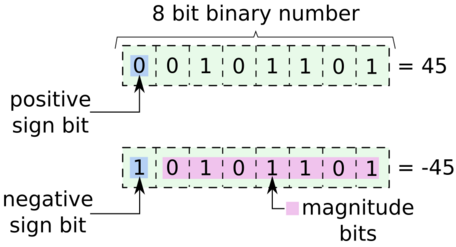



---




#### ❗**Exercício 1**❗

Qual o maior número positivo que podemos representar em inteiros com sinal se tivermos uma representação com magic_ishort bits? Justifique.

In [ ]:
#Resposta
print("O valor de magic_ishort é: ", magic_ishort)
numMax = (2**(magic_ishort-1)-1)
print("O maior número positivo que podemos representar em inteiros com sinal com ", magic_ishort, " bits é: ", numMax)

O valor de magic_ishort é:  11
O maior número positivo que podemos representar em inteiros com sinal com  11  bits é:  1023


<p>Como necessitamos de 1 dos 11 bits disponíveis para representar o sinal positivo (através do bit '0'), temos 10 bits disponíveis para representarmos o valor do número. Sendo assim, como estamos utilizando a representação binária: Numéro Máximo = $2^{10}$ - 1 = 1023 (ou seja conseguimos representar números positivos que vão de 0 a 1023). <p>
<p>A representação de 1023 em binário com sinal fica a seguinte: 01111111111<p>

---



E no Python, quantos bits ele usa?

Por "sorte", o Python usa _long int_ e estende a precisão no caso de inteiros se necessário, então é difícil termos problemas com inteiros em Python...Ufa!


### Números "reais" no computador

Agora começa o problema: como o computador representa números reais no computador?

Ele usa o que é conhecido como *ponto flutuante*, que nada mais é que uma padronização da nossa notação científica:




dcd36557db1b343d74991d99aeb50aadce64eb3a.svg

Mas **cuidado**, pois o computador não trabalha com base 10, e sim base 2 (binária), com ponto flutuante. Para facilitar o entendimento de alguns processos, muitos textos adotam a base 10, mas sempre temos que ter em mente que no fundo será usado a base 2.

Em 32 bits, no padrão IEEE-754 temos:


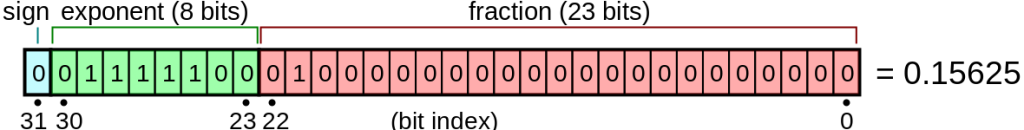

Isto é:


*   1 bit para o sinal (+/-)
*   8 bits para o expoente. Como precisamos de um sinal para o expoente, por convenção o expoente é subtraído por 127, que é 01111111 em binário (em precisão simples, float).
*   23 bits para a fração (mantissa)



*Desafio:* a parte da "fração", que gostaríamos que representasse casas "decimais", precisa ser montada com base binária! Ou seja, muitos números não serão passíveis de serem representados, ou são representados com algum erro.

Vejam alguns exemplos :





---


**Número "1"** em ponto flutuante é dado, em 32 bits, por:

$\color{blue}{0}\color{green}{01111111}\color{red}{00000000000000000000000}$

onde as cores indicam o $\color{blue}{sinal}$, o $\color{green}{expoente}$,  e a $\color{red}{mantissa}$, respectivamente.

Traduzindo (em binário ainda...):

$ (−1)^\color{blue}{0}×​2^{(\color{green}{01111111} − 01111111)​}\times ​1.\color{red}{00000000000000000000000} $

Traduzindo para decimal:
$(−1)^\color{blue}{0}×​2^{\color{green}{0}}×\color{red}{​1.0} = 1.0 $ (exato!).



---



**Número "0.5"** é só um pouco diferente do 1 em ponto flutuante é dado, em 32 bits:

No computador:
$\color{blue}{0}\color{green}{01111110}\color{red}{00000000000000000000000}$

Binário:
$ (−1)^\color{blue}{0}×​2^{(\color{green}{01111110} − 01111111)​}\times ​1.\color{red}{00000000000000000000000} $

Decimal:
$(−1)^\color{blue}{0}×​2^{\color{green}{-1}}×\color{red}{​1.0} = 0.5$ (exato!).



---


**Número "0.05"** complica, e muito, vejamos:

No computador: $\color{blue}{0}\color{green}{01111010}\color{red}{10011001100110011001101}$

Binário: $ (−1)^\color{blue}{0}×​2^{(\color{green}{01111010} − 01111111)​}\times ​1.\color{red}{10011001100110011001101} $

Decimal:
$(−1)^\color{blue}{0}×​2^{\color{green}{-5}}×1.\color{red}{60000002384185791015625} \approx 0.0500000007450580596923828125​$ - Não conseguimos representar exatamente :-( .


---



Referência: https://float.exposed/0xb3bc8b0f



---


#### ❗**Exercício 2**❗


1.   Qual o maior número representável em Python por aritmética de ponto flutuante no sistema que você está usando? (DICA: use a biblioteca sys.float_info (https://docs.python.org/3/library/sys.html) para saber mais sobre como o seu sistema trabalha com o tipo "float")

2.   O que acontece se chamar em Python um número maior que esse? Ou se fizer uma conta que resulte em um número maior que esse? (Dê um exemplo)

3. Quantos dígitos são bem representados nesse sistema de aritmética de ponto flutuante? (DICA: use o sys.float_info)

4. Qual o resultado da conta 1.0e-23 + 1.0e-23? Justifique.

5. Qual o resultado da conta 1.0 + 1.0e-23? Justifique.

6. Qual o resultado da conta 1.0e+14 + 1.0e-14? Justifique.

7. Leia o tutorial https://docs.python.org/pt-br/3/tutorial/floatingpoint.html e comente por que o computador não consegue representar o número 0.1 exatamente. Qual número aproximado é alocado na memória e usado nas contas?

8.  Escreva o seu número USP como um int em binário.

9.  Escreva o seu número USP como um double float em binário (explicite cada componente, incluindo sinal, mantissa e expoente, da forma: $(−1)^\color{blue}{X}×​2^{(\color{green}{YYYYYYYYY} − 01111111)​}\times ​1.\color{red}{ZZZZZZZZZZZ} $).




In [ ]:
# Códigos usados na resposta ilustrando cada caso
# 1.
print("Pergunta 1:")
print("O maior número representável em Pyhton por aritmética de ponto flutuante é: ", sys.float_info.max)
print("\n")

# 2.
print("Pergunta 2:")

print("Vamos tentar chamar um número um pouco maior que o número (1.7976931348623158e+308): ")
z = (1.7976931348623158e+308)
print(z)

print("Vamos tentar chamar um número bem maior que o número (3.7976931348623157e+308): ")
z = (3.7976931348623157e+308)
print(z)

print("Vamos tentar somar um número pequeno (10.0) ao número:")
x = sys.float_info.max
y = x + 10.0
print(y)

print("Vamos tentar somar um número muito grande (1.7976931348623157e+300) ao número:")
x = sys.float_info.max
y = x + 1.7976931348623157e+300
print(y)
print("\n")

# 3.
print("Pergunta 3:")
print("O número de dígitos bem representados nesse sistema de aritmética de ponto flutuante é: ", sys.float_info.dig)
print("\n")

# 4.
print("Pergunta 4:")
x = 1.0e-23
y = 1.0e-23
z = x+y
print("O resultado da soma de 1.0e-23 com 1.0e-23 é: ", z)
print("\n")

# 5.
print("Pergunta 5:")
x = 1.0
y = 1.0e-23
z = x+y
print("O resultado da soma de 1.0 com 1.0e-23 é: ", z)
print("\n")

# 6.
print("Pergunta 6:")
x = 1.0e+14
y = 1.0e-14
z = x+y
print("O resultado da soma de 1.0e+14 com 1.0e-14 é: %.10f" %z)
print("\n")

# 7.


# 8.
print("Pergunta 8:")
numUSP = 11200608
binarUSP = bin(numUSP)
print("O meu número USP (11200608) escrito em binário é: ", binarUSP)
print("\n")

# 9.
print("Pergunta 9:")
numUSP = 11200608

# Primeiramente, como o número é positivo, o valor do bit para o sinal é 0

print("O valor do bit de expoente é: ", 0)

# Após isso, vamos obter os bits referentes ao expoente:

expoente = np.log(numUSP)/np.log(2)
expoente = int(np.floor(expoente))

  # Precisamos somar o valor do bias (1023)

expoente += 1023
expoenteBinario = bin(expoente)
print("O valor do expoente em binário é: ", expoenteBinario)

# Com isso, obteremos os valores da mantissa:

mantissaDecimal = numUSP/(2**(expoente-1023))

  # A partir disso, podemos converter a parte decimal da mantissa em binário

mantissaDecimal = int(((mantissaDecimal - 1)*(10**(16))))
mantissaBinario = bin(mantissaDecimal)
print("O valor da mantissa em binário é: ", mantissaBinario)



Pergunta 1:
O maior número representável em Pyhton por aritmética de ponto flutuante é:  1.7976931348623157e+308


Pergunta 2:
Vamos tentar chamar um número um pouco maior que o número (1.7976931348623158e+308): 
1.7976931348623157e+308
Vamos tentar chamar um número bem maior que o número (3.7976931348623157e+308): 
inf
Vamos tentar somar um número pequeno (10.0) ao número:
1.7976931348623157e+308
Vamos tentar somar um número muito grande (1.7976931348623157e+300) ao número:
inf


Pergunta 3:
O número de dígitos bem representados nesse sistema de aritmética de ponto flutuante é:  15


Pergunta 4:
O resultado da soma de 1.0e-23 com 1.0e-23 é:  2e-23


Pergunta 5:
O resultado da soma de 1.0 com 1.0e-23 é:  1.0


Pergunta 6:
O resultado da soma de 1.0e+14 com 1.0e-14 é: 100000000000000.0000000000


Pergunta 8:
O meu número USP (11200608) escrito em binário é:  0b101010101110100001100000


Pergunta 9:
O valor do bit de expoente é:  0
O valor do expoente em binário é:  0b10000010110
O valor

**Responder aqui com texto as justificativas e observações:**



1. Segundo o comando .max da biblioteca "sys.float_info", o maior número que pode ser representado através de aritmética de ponto flutuante é o número 1.7976931348623157e+308.

2. <p>Ao se chamar um número um pouco maior que ele (no código utilizei o número 1.7976931348623158e+308), o número perde precisão e não fica igual ao desejado. Agora, se chamamos um número bem maior que ele (no código utilizei o número 3.7976931348623157e+308), o Python considera aquele número como infinito.<p><p> Isso também ocorre para quando fazemos contas com o número, se somamos o número com um número pequeno (no código, utilizei o número 10), o número perde precisão e não é possível saber se o número representado está correto. Agora, se chamamos somamos o número com outro número grande (no código, utilizei 1.7976931348623157e+300), o Pyhton considera que a soma resulta em infinito.<p><p>Sendo assim, conclui-se que o Python não lida bem com números do tipo "Float" maiores do que 1.7976931348623157e+308, em que ele considera ou que o número é infinito, ou há perda na precisão do número.<p>

3. Segundo o comando .dig da biblioteca "sys.float_info", o número de dígitos que podem ser bem representados através de aritmética de ponto flutuante (em Pyhton) é 15.

4. <p>O resultado da soma de 1.0e-23 com 1.0e-23 foi 2e-23.<p><p>O resultado da soma é exato, pois, mesmo sendo muito pequenos, ambas as parcelas tem a mesma ordem de grandeza (e mesmo tamanho da mantissa), o que faz com que o Python não precise realizar nenhum arredondamento e, portanto, mantém a precisão do número.<p>

5. <p>O resultado da soma de 1.0 com 1.0e-23 foi 1.0.<p>O resultado da soma não é exato pois, os tamanhos das mantissas dos números são mutio diferentes. Como já mencionado antes, a representação do número 1.0 em Pyhton é dada por 0b00111111111100000000000000000000, enquanto que a representação de 1.0e-23 é dada por 0b0000000000000000000000000000000000000000000000000000000000000001. Portanto, como o tamanho da mantissa de 1.0e-23 é muito maior (e, consequentemente, o seu valor é muito menor) que a de 1.0, acaba que a parcela 1.0e-23 acaba sendo descartada na realização da soma.<p>

6.  <p>O resultado da soma de 1.0e+14 com 1.0e-14 foi 100000000000000.0 (1.0e+14).<p> <p>Resumidamente, o resultado da soma não é exato pois, para representar o valor exato da soma seriam necessários 28 algarismos significativos. Entretanto, como mostrado no item "3" desse mesmo exercício, para este sistema, o Pyhton só consegue representar bem 15 alagrismos significativos. Portanto, a parcela 10e-14 da soma acaba por ser desprezada.<p>

7.  <p>O computador não consegue representar o número 0.1 exatamente em binário porque, em binário, ele tem uma representação periódica infinita, ou seja, em binário, o número 0.1 é uma fração binária que se repete infinitamente. Isso é semelhante àqueles números decimais que chamamos de "dízima periódica", tal qual o número 1/3, por exemplo, que, repete o número 3 infinitamente nas suas casas decimais.<p>
<p>O número aproximado de 0.1 que é alocado na memória e usado nas contas é: 0.1000000000000000055511151231257827021181583404541015625.
<p>

8.  O número USP - 11200608 - escrito em binário é:  101010101110100001100000.

9.  <p>Através do código apresentado acima, temos que o número 11200608 (meu número USP) representado como um double float em binário é: <p>
<p>$2^{0}$x$2^{(10000010110 - 01111111111)}$x1.1011111010001100011011001001010010111011010110100001<p>
<p>Ou seja, os valores, em binário, para: o sinal, o expoente e a mantissa são: <p>
<p> Sinal: 0<p>
<p> Expoente: 10000010110<p>
<p> Mantissa: 1011111010001100011011001001010010111011010110100001<p>








---


### Simulando aritmética de ponto flutuante

Uma forma de simular a aritmética de ponto flutuante em diferentes tipos de computadores, com mais ou menos "bits" para representação numérica, é considerando o número de **algarismos significativos**.

Dada uma "máquina" com uma certa precisão, definimos o número de **algarismos significativos** como sendo o número de casas decimais, ou dígitos, que o computador consegue representar depois de transformado em notação científica.

Ex: Escreva os números na notação científica com 0,AAAAA x 10^B e verifique que

1000000 : possui 1 alg. sig.

0.00001 : possui 1 alg. sig.

1.00001 : possui 6 alg. sig.

0.12345 : possui 5 alg. sig.

Qualquer conta realizada deve ser ajustada (arredondada) no final para ficar nessa representação!



**Cuidado!**

Essa representação com algarismos significativos na base 10 é uma simplificação para fins didáticos, pois lembre-se que o computador trabalha com base 2.





#### ❗**Exercício 3**❗

1.   Quantos algarismos significativos são necessários para representar o seu
número USP na forma de um *float* em base 10? Justifique.

2.  Divida o seu número USP por 17. Represente o número resultante com aritmética de ponto flutuante com 5 algarismos significativos na base 10, arredondando se necessário.



In [ ]:
#Código para resposta
#Pergunta 2:
print("O valor de nUSP/17 é: ", nusp/17)

#   Como podemos utilizar apenas 5 algarismos significativos, eles seriam 65885.
#   Entretanto, como o próximo número algarismo que aparece é o algarismo 9, devemos arredondar o número
# para 65886.
# Assim, temos que nUSP/17 = 0.65886 x 10^(6)

print("O valor de nUSP arredondado para 5 algarismos significativos é: ", 0.65886, " x 10^6")

O valor de nUSP/17 é:  658859.2941176471
O valor de nUSP arredondado para 5 algarismos significativos é:  0.65886  x 10^6


**Resposta:**

<p> 1) São necessários 8 algarismos significativos para representar o meu número USP (11200608) na forma de um float em base 10:<p>
<p>0.11200608 x $10^{8}$ = 11200608<p>

<p> 2) O valor de nUSP/17 é, aproximadamente, 658859.2941. <p>
<p>Como estamos utilizando aritmética de ponto flutuante com 5 algarismos significativos na base 10, deveríamos utilizar apenas os 5 algarismos mais significativos, ou seja, 65885. Entretanto, como o próximo alagrismo mais significativo é um 9, devemos arredondar o número para cima. Portanto, devemos utilizar o número 65886. Sendo assim, temos que: <p>
<p> 0.65886 x $10^{6} = 658860 ≅ 658859.2941.<p>



---



---




Para saber esse número de algarismos (dígitos) significativos na sua máquina, use:

In [ ]:
print(sys.float_info.dig)

15


Em Python, podemos simular esses arredondamentos a cada operação usando a seguinte função:

In [ ]:
!pip install sigfig
from sigfig import round


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Um computador com 16bit tem 3 algarismos significativos (10 bits de mantissa)

(precisão conhecida como "half precision float")


Um exemplo tentando calcular $\tan(\pi/2-0.001)$ numericamente:

In [ ]:
# Computador de 16 bits (3 alg. sig.)
dig = 3

# Números em precisão dupla (64 bits)
# Python usa IEEE-754 double precision float
pi_double = np.pi
tan_double = np.tan(pi_double/2.0-0.001) #deveria ser bem grande!
print("Precisão dupla: ", pi_double, tan_double)

# Números em precisão "meia" (16 bits) simulada
# Todas as operações devem ser arredondadas!
pi_half = round(pi_double, dig)
tan_half = round(np.tan(round(round(pi_half/2.0,dig)-0.001,dig)), dig) #deveria ser bem grande!

print("Precisão meia :", pi_half, tan_half)


Precisão dupla:  3.141592653589793 999.9996666666933
Precisão meia : 3.14 1260.0




---



## Resolvendo Sistemas Lineares - Eliminação Gaussiana

### O problema

$$ Ax=b $$

Para os problemas a seguir, você deve usar uma matriz especial, construída conforme o código abaixo. Há 3 parâmetros importantes na geração da matriz:

* **n** : o tamanho da matriz
* **magic_ilong** : o seu número mágico, que fará sua matriz ser única
* **cond_pow** : Um número inteiro que quando maior, torna o sistema mais difícil de ser resolvido, por estar mais propenso a erros de arredondamento. Este número será usado na contrução do *número de condição* da matriz gerada (https://pt.wikipedia.org/wiki/N%C3%BAmero_de_condicionamento).

In [ ]:
# Sistema linear para testes - específica para cada aluno
# ------------------------------------------------------------
# Entrada:
#  n: tamanho da mtriz
#  magic_ilong: seed de geração de números aleatórios
#  cond_pow : potência usada na definição do número de condição (inteiro positivo)
#
# Saída:
#   A: Matrix do sistema linear Ax=b
#   b: lado diretiro do sistema Ax=b
#   a: matriz aumentada [A|b]
def meu_sistema_linear(n=100, magic_ilong=magic_ilong, cond_pow=8):


  # Tamanho do sistema
  #n = 20

  np.random.seed(magic_ilong)

  # Gera matriz aleatória com número de condição alto usando decomposição QR
  cond = np.log(10**cond_pow) # Numero de condição
  exp_vec = np.arange(-cond/4., cond * (n + 1)/(4 * (n - 1)), cond/(2.*(n-1)))[:n]
  s = np.exp(exp_vec)
  S = np.diag(s)
  U, _ = la.qr((np.random.rand(n, n) - 5.) * 200)
  V, _ = la.qr((np.random.rand(n, n) - 5.) * 200)
  A = U.dot(S).dot(V.T)
  A = A.dot(A.T) #Simétrica

  #Vetor b - vamos gerar b tal que a solução seja sempre um vetor com 1
  x = np.ones((n))
  b = A@x


  #Matrix aumentada aleatória a=[A|b]
  a = np.c_[A,b]

  np.set_printoptions(precision=3, suppress=True)
  #print("A:" , A[:10, :10]) #imprimir só o começo da matriz
  #print()
  #print("b:", b[:10]) #imprimir só o começo do vetor b
  #print()
  #print("a:", a) #imprimir a matriz aumentada

  return A, b, a

#### 🧩 *Reflexão*

Você consegue explicar como essa matriz é gerada e discutir suas propriedades a partir desse código?



---



---



O algoritmo clássico, conforme visto em aula:

In [ ]:
# Método Clássico de Eliminação Gaussiana
#
# O método recebe como entrada uma matrix aumentada a=[A|b],
# com dimensões n linhas por n+1 colunas, tendo b na última
#
# O método retorna a solução do sistema linear Ax=b,
#            ou um erro quando isso não for possível
def elim_gauss(a_orig):
  #Faço uma cópia, para não estragar a matriz original
  a = np.copy(a_orig)

  #Número de linhas e colunas
  n,m = a.shape

  # Vetor da solução
  x = np.empty((n))

  #Verifica se usuário forneceu uma matriz no formato certo
  if m != n+1 :
    print("Essa matriz não tem dimensões adequadas:", n, m)
    return x

  # Escalonamento
  for i in range(n):
      if a[i,i] == 0.0:
          print('Ainda não implementei pivotamento :-( ')
          return x

      for j in range(i+1, n):
          ratio = a[j,i]/a[i,i]
          for k in range(n+1):
              a[j,k] = a[j,k] - ratio * a[i,k]

  # Substituição
  x[n-1] = a[n-1,n]/a[n-1,n-1]

  for i in range(n-2,-1,-1):
      x[i] = a[i,n]

      for j in range(i+1,n):
          x[i] = x[i] - a[i,j]*x[j]

      x[i] = x[i]/a[i,i]

  return x

Vamos fazer um teste com uma matriz aleatória especial

Vamos testar o nosso esquema usando uma matriz com gerada com parâmetros:

* n = 300

In [ ]:
start_time = time.time()
A, b, a = meu_sistema_linear(300, magic_ilong)
x = elim_gauss(a)
tempo_orig = time.time() - start_time
print()

print("Solução", x[:10]) #imprime só alguns elementos da solução
print("\n\nResíduo max|b-Ax|: ", np.max(np.abs(b-A@x)), " Tempo que levou: ", tempo_orig, " segundos")



Solução [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Resíduo max|b-Ax|:  3.183231456205249e-12  Tempo que levou:  9.398735523223877  segundos


**Desafios**


*   Esse método que implementamos parece funcionar, mas está muito lento! Como podemos melhorar a sua performance?

*   O resíduo parece bem grande, por que não está mais perto de 10e-16? (que seria o erro de arredondamento esperado para uma aritmética de ponto flutuante com 64 bits (double float)).

Vamos discutir esses dois pontos a seguir.



###Versão vetorizada do método de eliminação Gaussiana

Python é uma linguagem "interpretada", então cada linha é lida e executada individualmente, sem qualquer otimização para eficiência. Isso faz com que "loops" (for) em Python sejam bem lentos.

Podemos otimizar códigos em Python evitando loops em Python puro, por exemplo usando vetores do Numpy. A biblioteca Numpy é uma biblioteca pré-compilada e otimizada para operações de álgebra linear, portanto, quando usamos sua aritmética estamos usando recursos computacionais de forma eficiente.

Mais informações no tutorial: https://drive.google.com/file/d/1yrt5UgeYgyZdAcTmqFUJkWmOBgfoe4SP/view?usp=sharing

Vejamos 2 pequenas mudanças no código de eliminação Gaussiana:

In [ ]:
# Método Clássico de Eliminação Gaussiana com vetorização
#
# O método recebe como entrada uma matrix aumentada a=[A|b],
# com dimensões n linhas por n+1 colunas, tendo b na última
#
# O método retorna a solução do sistema linear Ax=b,
#            ou um erro quando isso não for possível
def elim_gauss_vet(a_orig):
  #Faço uma cópia, para não estragar a matriz original
  a = np.copy(a_orig)

  #Número de linhas e colunas
  n,m = a.shape

  # Vetor da solução
  x = np.empty((n))

  #Verifica se usuário forneceu uma matriz no formato certo
  if m != n+1 :
    print("Essa matriz não tem dimensões adequadas:", n, m)
    return x

  # Escalonamento
  for i in range(n):
      if a[i,i] == 0.0:
          print('Ainda não implementei pivotamento :-( ')
          return x

      for j in range(i+1, n):
          ratio = a[j,i]/a[i,i]
          #Vetorizei aqui!
          #for k in range(n+1):
          #    a[j,k] = a[j,k] - ratio * a[i,k]
          a[j,:] = a[j,:] - ratio * a[i,:]

  # Substituição
  x[n-1] = a[n-1,n]/a[n-1,n-1]

  for i in range(n-2,-1,-1):
      #Vetorizei aqui!
      #x[i] = a[i,n]
      #for j in range(i+1,n):
      #    x[i] = x[i] - a[i,j]*x[j]
      #x[i] = x[i]/a[i,i]
      x[i] = (a[i,n] - np.dot(a[i,i+1:n], x[i+1:n]))/a[i,i]

  return x

Testando com a mesma matriz de antes:

In [ ]:
start_time = time.time()
x_vet = elim_gauss_vet(a)
tempo_vet = time.time() - start_time
print("Solução:", x_vet[:10]) #imprime só alguns elementos da solução
print("Resíduo max|b-Ax|: ", np.max(np.abs(b-A@x_vet)), " Tempo que levou: ", tempo_vet, " segundos")
print()
print("Aceleração em relação ao método sem vetorização:", tempo_orig/tempo_vet, " vezes mais rápido")
print("Diferença máxima na solução:", np.max(np.max(x-x_vet)))

Solução: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Resíduo max|b-Ax|:  2.2737367544323206e-12  Tempo que levou:  0.2261512279510498  segundos

Aceleração em relação ao método sem vetorização: 41.559515764637915  vezes mais rápido
Diferença máxima na solução: 9.769962616701378e-15


Observações:



*   O método ficou muito mais rápido!
*   A solução não ficou idêntica à solução anterior, pois a ordem das contas mudou um pouco, e portanto temos pequenos erros de arredondamento se acumulando de formas diferentes.



### Dá para vetorizar mais?

Uma forma é mudar um pouco o algoritmo. Vejamos um algoritmo de decomposição LU (que vai servir de base para Elim. Gaussiana vetorial): Algoritmo de Crout (ou Doolittle, dependendo de onde colocamos a diagonal unitária).

O problema agora é resolver

$$ Ax=LUx=b $$


In [ ]:
# Método Clássico de Eliminação Gaussiana via decomposição LU
#
# O método recebe como entrada uma matrix A (n x n) e o vetor b (n x 1),
#
# O método retorna a solução do sistema linear Ax=b,
#            ou um erro quando isso não for possível
# Devolve tambem as matrizes L e U da decomposição A=LU
def elim_gauss_LU(A, b):
  #Número de linhas e colunas
  n,m = A.shape

  # Vetor da solução
  x = np.empty((n))

  #Verifica se usuário forneceu uma matriz no formato certo
  if m != n :
    print("Essa matriz não tem dimensões adequadas:", n, m)
    return x

  #Guardo tanto L quanto U em uma única matriz!!!!
  LU = np.eye(n) #Matriz identidade

  # @ faz multiplicação de matrizes usando numpy
  for i in range(n):
      if LU[i,i] == 0.0:
          print('Ainda não implementei pivotamento :-( ')
          return x
      #Varre linhas superiores (Upper)
      LU[i,i:] = A[i,i:]-LU[i,:i] @ LU[:i,i:]
      #Varre colunas inferiores (Lower)
      LU[(i+1):,i] = ( A[(i+1):,i]- LU[(i+1):,:i] @ LU[:i,i] ) / LU[i,i]


  # Substituição
  # LUx=b =>  Ly=b,  Ux=y
  y = np.zeros(n)
  # Ly=b
  y[0] = b[0]
  for i in range(1,n,1):
      #Vetorizei aqui!
      y[i] = (b[i] - np.dot(LU[i,:i], y[:i]))

  # Ux=y
  x = np.zeros(n)
  x[n-1] = y[n-1]/LU[n-1,n-1]
  for i in range(n-2,-1,-1):
      #Vetorizei aqui!
      x[i] = (y[i] - np.dot(LU[i,i+1:], x[i+1:]))/LU[i,i]

  #Forma matrizes L e U, tais que A=LU
  U = np.triu(LU) # Pega só triangular superior
  L = np.tril(LU) # Pega só triangular inferior
  np.fill_diagonal(L, 1.0) # Preenche com 1 a diagonal inferior
  return x, L, U

Testando:

In [ ]:
start_time = time.time()
x_LU, L, U = elim_gauss_LU(A, b)
tempo_LU = time.time() - start_time
print("Solução:", x_LU[:10]) #imprime só alguns elementos da solução
print("Resíduo max|b-Ax|: ", np.max(np.abs(b-A@x_LU)), " Tempo que levou: ", tempo_LU, " segundos")
print()
print("Aceleração em relação ao método sem vetorização:", tempo_orig/tempo_LU, " vezes mais rápido")
print("Diferença máxima na solução:", np.max(np.max(x-x_LU)))
print('\nTeste LU: ')
print(np.max(np.max(np.abs(L@U-A))))

Solução: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Resíduo max|b-Ax|:  1.6200374375330284e-12  Tempo que levou:  0.026169538497924805  segundos

Aceleração em relação ao método sem vetorização: 359.14792780809563  vezes mais rápido
Diferença máxima na solução: 1.7204232483081228e-09

Teste LU: 
1.3642420526593924e-12


Impressionante a diferença de performance, não? ;-)







---



#### 🧩*Desafio Opcional*

Você consegue usar essa ideia do LU para fazer diretamente a solução do sistema linear vetorial, com apenas um loop, sem precisar calcular L e U explicitamente como fizemos?



---



## E a precisão das contas?

#### ❗**Exercício 4**❗

Implemente uma versão análoga à apresentada no primeiro código de eliminação de Gauss (a função elim_gauss()), mas que agora arredonde cada operação feita para um certo número de algarismos significations.

Para tanto, use round(número, sigfigs) após cada conta que realizar no algoritmo. TODAS as contas de +-*/ devem ser sempre arredondadas!

Coloque sua implementação no espaço abaixo,

In [ ]:
# Método Clássico de Eliminação Gaussiana com aritmética de ponto flutuante restrita
#
# O método recebe como entrada uma matrix aumentada a=[A,b] referente ao
#    sistema linear Ax=b, com A (n x n) e o vetor b (n x 1),
# O método recebe também o número de algarismos significativos a serem usados nas contas
#
# O método retorna a solução do sistema linear Ax=b,
#            ou um erro quando isso não for possível
def elim_gauss_precisao_reduzida(a_orig, sigfig=3):

  #Faço uma cópia, para não estragar a matriz original
  a = np.copy(a_orig)

  #Número de linhas e colunas
  n,m = a.shape

  # Vetor da solução
  x = np.empty((n))

  #Verifica se usuário forneceu uma matriz no formato certo
  if m != n+1 :
    print("Essa matriz não tem dimensões adequadas:", n, m)
    return x

  # Escalonamento
  for i in range(n):
      if a[i,i] == 0.0:
          print('Ainda não implementei pivotamento :-( ')
          return x

      for j in range(i+1, n):
          ratio = round(a[j,i]/a[i,i],sigfig)
          for k in range(n+1):
              a[j,k] = round(a[j,k] - round(ratio * a[i,k],sigfig),sigfig)

  # Substituição
  x[n-1] = round(a[n-1,n]/a[n-1,n-1],sigfig)

  for i in range(n-2,-1,-1):
      x[i] = a[i,n]

      for j in range(i+1,n):
          x[i] = round(x[i] - round(a[i,j]*x[j],sigfig),sigfig)

      x[i] = round(x[i]/a[i,i],sigfig)

  return x




---




Teste o seu código considerando a sua matriz aleatória anterior variando o número de algarismos significativos de 4 até 16.

*    Use como tamanho da matriz pelo menos $n\geq 20$
*    Monte uma tabela, ou gráfico, com o erro máximo da solução obtida em relação a solução obtida com precisão máxima do Python (o "x" obtido com algoritmo original, sem arredondamentos).
*   Qual a razão de caimento do erro quando aumentamos 1 algarismo significativo (aproximadamente)?




In [ ]:
#   Coloque seu código aqui

#   Monto a matriz com tamanho n = 40:
A, b, a = meu_sistema_linear(30, magic_ilong)


#   Funções que realizam as chamadas dos métodos e retornam o erro máximo

def semAlgSign():

# Chama o método sem precisão reduzida:

  x = elim_gauss(a)
  erroMaxSemArredondamento = np.max(np.abs(b-A@x))

  return erroMaxSemArredondamento


def comAlgSign(algaSigni):

  #Chama o método com precisão reduzida para "algaSigni" algarismos significativos:

  x = elim_gauss_precisao_reduzida(a, algaSigni)
  erroMaxComArredondamento = np.max(np.abs(b-A@x))

  return erroMaxComArredondamento

#  Crio uma lista com todos os números de algarismos significativos desejados e obtenho listas
# com os valores dos erros máximos para cada número de algarismos significativos:

#Lista com todos os algarismos significativos desejados:

algarismos = [4,5,6,7,8,9,10,11,12,13,14,15,16]

#Lista com o erro máximo para o método sem precisão reduzida:

erroMaxSemArredondamento =  semAlgSign()
mErroMaxSemArredondamento = []
for i in range(len(algarismos)):
  mErroMaxSemArredondamento.append(erroMaxSemArredondamento)

#Lista com os erros máximos para cada número de algarismos significativos de 4 a 16:

mErroMaxComArredondamento = []
for i in range(4,17):
  erroMaxComArredondamento = comAlgSign(i)
  mErroMaxComArredondamento.append(erroMaxComArredondamento)


/usr/local/lib/python3.10/dist-packages/sigfig/sigfig.py:586: UserWarning: warning: 4 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/usr/local/lib/python3.10/dist-packages/sigfig/sigfig.py:586: UserWarning: warning: 4 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/usr/local/lib/python3.10/dist-packages/sigfig/sigfig.py:586: UserWarning: warning: 4 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/usr/local/lib/python3.10/dist-packages/sigfig/sigfig.py:586: UserWarning: warning: 5 significant figures requested from num

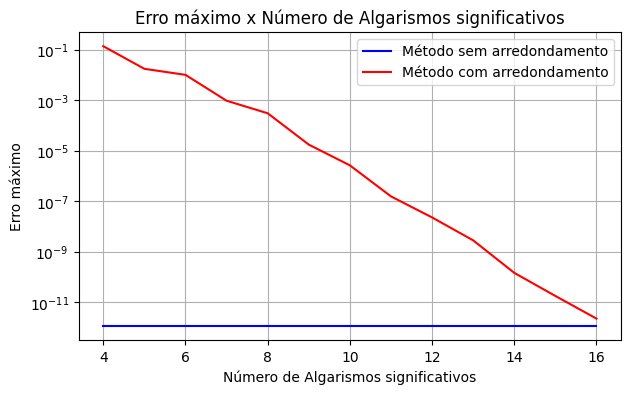

In [ ]:
#Gráfico:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig,axe = plt.subplots(figsize = (7,4))

axe.plot(algarismos, mErroMaxSemArredondamento, color="#0000FF", label="Método sem arredondamento")
axe.plot(algarismos, mErroMaxComArredondamento, color="#FF0000", label="Método com arredondamento")

axe.set_title("Erro máximo x Número de Algarismos significativos")
axe.set_xlabel("Número de Algarismos significativos")
axe.set_ylabel("Erro máximo")

plt.yscale('log')
plt.legend()
plt.grid(True)

plt.show()

Discuta aqui o que observou dos resultados:
<p>A partir da análise do gráfico, conclui-se que, conforme aumenta-se o número de algarismos significativos nos arredondamentos, diminui-se o erro máximo das soluções. Resultado este que era esperado.<p> <p> Além disso, observa-se que, a razão de caimento do erro quando aumenta-se um algarismo significativo na realização dos arredondamentos é da ordem de 0,1 ($10^{-1}$). Ou seja, para cada algarismo significativo a mais utilizado, erro máximo cometido diminui da ordem de 10 vezes. <p>



---



## Pivotamento Parcial: Melhorando a precisão permutando linhas

A *condensação pivotal parcial* consiste em escolher como pivô, a cada passo do escalonamento, o elemento na coluna-pivô (da diagonal principal para baixo) com maior valor absoluto, de modo que todos os multiplicadores tenham módulo menor ou igual a 1.

O algoritmo consiste na seguinte estratégia:
1. Na eliminação de Gauss o pivô é termo da diagonal que será usado como divisor para chegarmos no multiplicador. Queremos que o pivô usado para construção do multiplicador seja o maior possível, para que o multiplicador seja menor que 1.
2. A cada nova coluna que vou escalonar (digamos que seja a coluna j, com o pivô sendo $a_{jj}$), verifico o valor em módulo dos elementos abaixo do pivô (elementos $a_{kj}$, $k\geq j$). Escolho a linha ($k$) que tem o elemento com maior valor em módulo, e troco com a linha principal ($j$), isto é, troco a linha j com a k.  
3. Prossigo com a estratégia usual de escalonamento com a matriz com as linhas trocadas. Note que solução do sistema não é alterada pela troca de linhas. Além disso, note ainda que não "estragamos" o escalonamento anterior, pois sempre trocamos com linhas abaixo do pivô.

Para mais detalhes, veja a video-aula https://drive.google.com/file/d/1h2UJUaQvEYR7mO00fiJoihJmeTwv42BU/view?usp=sharing.



---



#### ❗**Exercício 5**❗

Implemente uma modificação do seu algoritmo de eliminação de Gauss com precisão reduzida agora considerando um pivotamento parcial, trocando as linhas nas etapas do escalonamento de forma a sempre obter um multiplicador em módulo menor que 1.

Aproveite e inclua no seu código uma condição para dizer se o sistema tem determinante nulo ou não.

Repita o teste feito anteriormente e comente sobre o que observou a respeito do erro obtido.

In [ ]:

# Método Clássico de Eliminação Gaussiana com aritmética de ponto flutuante restrita
#    e condensação pivotal parcial
#
# O método recebe como entrada uma matrix aumentada a=[A,b] referente ao
#    sistema linear Ax=b, com A (n x n) e o vetor b (n x 1),
# O método recebe também o número de algarismos significativos a serem usados nas contas
#
# O método retorna a solução do sistema linear Ax=b,
#            ou um erro quando isso não for possível


################ Funções auxiliares ##########################

def achaPivo(A,linhaInicial,coluna):

    linha = linhaInicial
    maior = A[linhaInicial][coluna]
    for i in range(linhaInicial, len(A)-1):
        if abs(maior) < abs(A[i+1][coluna]):
            maior = A[i+1][coluna]
            linha = i+1

    return linha

def trocaLinha(A,linhaAtual,linhaPivo):

    A[[linhaAtual, linhaPivo], :] = A[[linhaPivo, linhaAtual], :]

    return A

def condPivotal(A,linhaAtual,colunaAtual):

    linhaPivo = achaPivo(A,linhaAtual,colunaAtual)
    A = trocaLinha(A,linhaAtual,linhaPivo)

    return A

#################################################################

def elim_gauss_pivot_precisao_reduzida(a_orig, sigfig=3):

  #Faço uma cópia, para não estragar a matriz original
  a = np.copy(a_orig)

  #Número de linhas e colunas
  n,m = a.shape

  # Vetor da solução
  x = np.empty((n))

  #Verifica se usuário forneceu uma matriz no formato certo
  if m != n+1 :
    print("Essa matriz não tem dimensões adequadas:", n, m)
    return x

  #Cálculo o valor do determinante:

  #Excluo a última coluna da matriz aumentada 'a' e obtenho a matriz do sistema sem os termos independentes:
  M = np.delete(a, np.s_[n], 1)
  det = np.linalg.det(M)
  if det == 0.0:
    print("Sistema indeterminado ou impossível!")
    return a

  # Escalonamento
  for i in range(n):
      a = condPivotal(a,i,i) #realiza a condensação pivotal parcial
      for j in range(i+1, n):
          ratio = round(a[j,i]/a[i,i],sigfig)
          for k in range(n+1):
              a[j,k] = round(a[j,k] - round(ratio * a[i,k],sigfig),sigfig)

  # Substituição
  x[n-1] = round(a[n-1,n]/a[n-1,n-1],sigfig)

  for i in range(n-2,-1,-1):
      x[i] = a[i,n]

      for j in range(i+1,n):
          x[i] = round(x[i] - round(a[i,j]*x[j],sigfig),sigfig)

      x[i] = round(x[i]/a[i,i],sigfig)

  return x


/usr/local/lib/python3.10/dist-packages/sigfig/sigfig.py:586: UserWarning: warning: 10 significant figures requested from number with only 6 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/usr/local/lib/python3.10/dist-packages/sigfig/sigfig.py:586: UserWarning: warning: 11 significant figures requested from number with only 7 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/usr/local/lib/python3.10/dist-packages/sigfig/sigfig.py:586: UserWarning: warning: 13 significant figures requested from number with only 9 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/usr/local/lib/python3.10/dist-packages/sigfig/sigfig.py:586: UserWarning: warning: 13 significant figures requested from

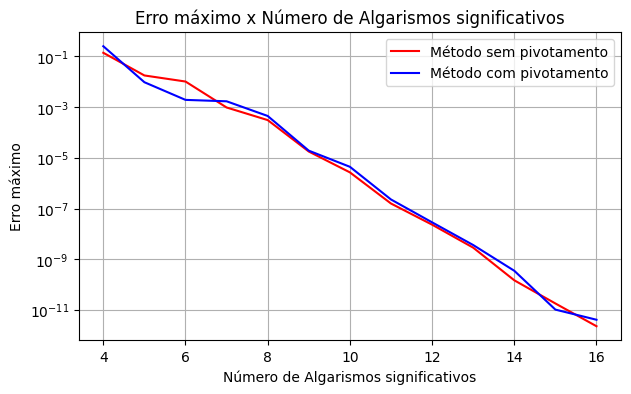

In [ ]:
#Coloque aqui o seu código de teste do método implementado:

def comAlgSignComPivo(algaSigni):

  #Chama o método com precisão reduzida para "algaSigni" algarismos significativos:

  #start_time = time.time()
  x = elim_gauss_pivot_precisao_reduzida(a, algaSigni)
  #tempo_orig = time.time() - start_time
  erroMaxComArredondamentoComPivot = np.max(np.abs(b-A@x))

  return erroMaxComArredondamentoComPivot

#Erros máximos para o método com condensação pivotal:
mErroMaxComArredondamentoComPivota = []
for i in range(4,17):
  erroMaxComArredondamentoComPivota = comAlgSignComPivo(i)
  mErroMaxComArredondamentoComPivota.append(erroMaxComArredondamentoComPivota)

#Gráfico:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig,axe = plt.subplots(figsize = (7,4))

axe.plot(algarismos, mErroMaxComArredondamento, color="#FF0000", label="Método sem pivotamento")
axe.plot(algarismos, mErroMaxComArredondamentoComPivota, color="#0000FF", label="Método com pivotamento")

axe.set_title("Erro máximo x Número de Algarismos significativos")
axe.set_xlabel("Número de Algarismos significativos")
axe.set_ylabel("Erro máximo")

plt.yscale('log')
plt.legend()
plt.grid(True)

plt.show()


Coloque aqui observações sobre o experimento realizado:

* A precisão da solução melhorou com o pivotamento?
<p>A partir da observação do gráfico elaborado, pode-se concluir que, há uma ligeira diminuição no erro máximo quando utiliza-se de 4 a 7 algarismos significativos nos arredondamentos. Entretanto, conforme aumenta-se o número de algarismos significativos utilizados nos arredondamentos, essa diferença é praticamente imperceptível e ambos os métodos (sem pivotamento e com pivotamento) passam a ter erros máximos praticamente idênticos. <p>
* Será que para qualquer matriz o erro vai sempre melhorar?
<p>Não, o erro entre os métodos será igual para as matrizes as quais já possuem os maiores pivôs (em módulo) sem precisarem realizar trocas de linhas. (ou seja, os elementos das diagonais principais já são os maiores de cada coluna). Um exemplo de matriz cujo erro não é melhorado através de pivotamento parcial (condensação pivotal) é:

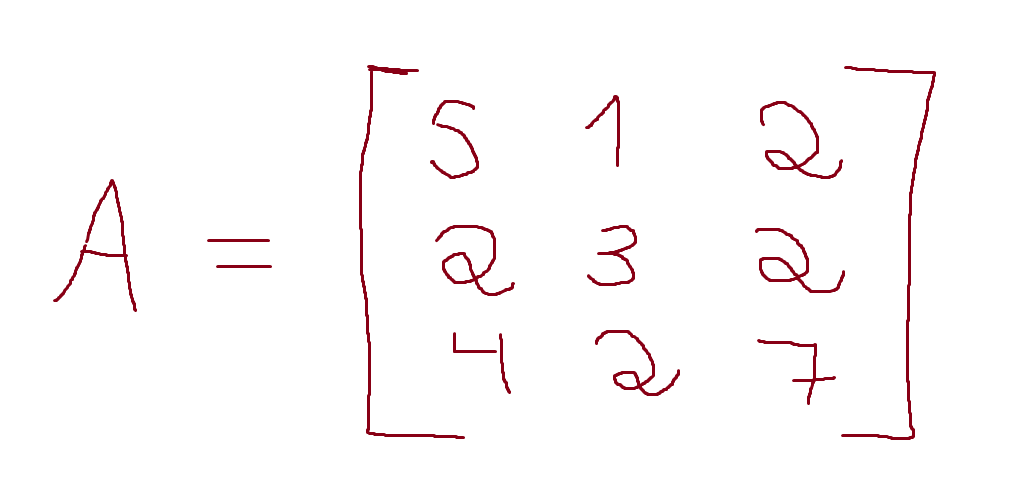
<p>

* 🧩 Consegue ilustrar algum teste que o pivotamento não ajuda?




---



# ❗ Tarefa Final ❗


Queremos encontrar um polinômio de grau $n>0$,

$$ p_n(x) = a_0 + a_1 x + a_2 x^2 + ... + a_n x^n $$

de modo que

$$ p_n(x_k) = y_k, \quad (0 \leq k \leq n), $$

em que os pares $(x_k, y_k)$ são dados e $x_k$ são distintos para diferentes $k$.

Para isso, escrevemos o sistema linear com $n+1$ equações, uma para cada par $(x_k, y_k)$

$$ p_n(x_k) = a_0 + a_1 x_k + a_2 x_k^2 + ... + a_n x_k^n = y_k, $$

que tem como incógnitas os $n+1$ coeficientes $a_j$, $j=0,1,...,n$.

A matriz do sistema resultante é conhecida como Matriz de Vandermonde (https://pt.wikipedia.org/wiki/Matriz_de_Vandermonde) e o problema em questão é um problema de interpolação (que veremos mais adiante no curso).


**Implementação**

Use o código que implementou de eliminação de Gauss com condensação pivotal com um certo número de digitos significativos fixados.

**Teste 1**

Teste o seu método resolvendo o sistema linear do problema descrito na tarefa considerando:

$$n = 5$$

$$x_k=k+1, \quad k=0,1,...,n$$

$$ y_k = x_k^6 - \text{magic_ishort} * x_k^5 $$

considerando 4, 8, 12 e 16 algarismos significativos.

Apresente em cada caso o valor do erro:

$$E = \max_{k=0,1,..,n}| p(x_k)-y_k | $$

[[     1      1      1      1      1      1    -10]
 [     1      2      4      8     16     32   -288]
 [     1      3      9     27     81    243  -1944]
 [     1      4     16     64    256   1024  -7168]
 [     1      5     25    125    625   3125 -18750]
 [     1      6     36    216   1296   7776 -38880]]
[   -10   -288  -1944  -7168 -18750 -38880]
[1 2 3 4 5 6]
[17.2  0.   0.   0. ]


/usr/local/lib/python3.10/dist-packages/sigfig/sigfig.py:586: UserWarning: warning: 8 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/usr/local/lib/python3.10/dist-packages/sigfig/sigfig.py:586: UserWarning: warning: 8 significant figures requested from number with only 3 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/usr/local/lib/python3.10/dist-packages/sigfig/sigfig.py:586: UserWarning: warning: 12 significant figures requested from number with only 2 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))
/usr/local/lib/python3.10/dist-packages/sigfig/sigfig.py:586: UserWarning: warning: 12 significant figures requested from n

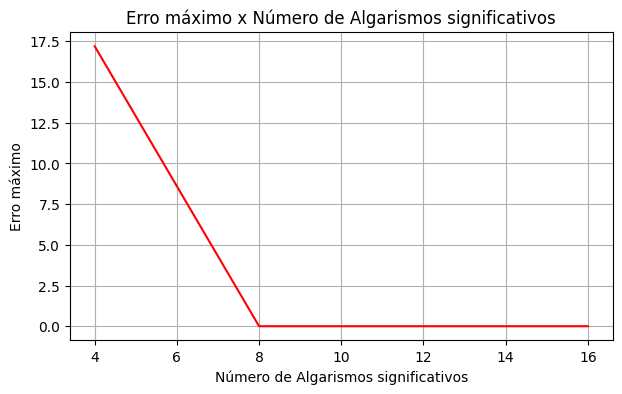

In [ ]:
#Coloque seus códigos aqui

#Função que obtém o vetor de y(x_k):

def calculaY(k):
    return ((k+1)**6)-(magic_ishort*((k+1)**5))


#Função que obtém a matriz com os valores de X_k

def calculaX(k):
    return k+1

#Função que constroi a matriz aumentada a = [M|y]

def constroiSistema(valoresK,x,y):

  for i in range(0,3):
    tempPar = [z for z in x[valoresK[:]]**(2*i)]
    tempImpar = [c for c in x[valoresK[:]]**(2*i+1)]
    if i == 0:
      M = np.column_stack((tempPar,tempImpar))
    else:
      M = np.column_stack((M,tempPar,tempImpar))

  a = np.column_stack((M,y))

  return a

#Função que obtém os arrays da matriz aumentada, x e y:

def obtemMatrizes(valoresK):

  y = np.array([k for k in calculaY(valoresK[:])])
  x = np.array([k for k in calculaX(valoresK[:])])

  a = constroiSistema(valoresK,x,y)

  return a,x,y

#Função que retorna um array com os valores de p(x_k):

def calculaP_xk(x,valoresK,coeficientes):

  p_xK = []
  for i in range(0,6):
    temp = []
    for j in range(0,6):
      produto = np.sum(np.array((x[i]**[j])*coeficientes[j]))
      temp.append(produto)
    temp = np.array(temp)
    soma = np.sum(temp)
    p_xK.append(soma)

  return np.array(p_xK)

#Função que retorna o erro máximo entre |p(x_k)-y_k|:

def Erro(a,y,x,alg,valoresK):

  coeficientes = elim_gauss_pivot_precisao_reduzida(a,alg)
  p_xk = calculaP_xk(x,valoresK,coeficientes)
  erros = np.abs(y - p_xk)

  return np.max(erros)


valoresK = np.array([0,1,2,3,4,5])

a,x,y = obtemMatrizes(valoresK)
print(a)
print(y)
print(x)

#Obtenção dos valores dos erros máximos para 4,8,12 e 16 algarismos significativos:

algarismos = np.array([4,8,12,16])

erroMax = []
for i in range(len(algarismos)):
  tempErro = Erro(a,y,x,int(algarismos[i]),valoresK)
  erroMax.append(tempErro)
erroMax = np.array(erroMax)

print(erroMax)

#Gráfico:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig,axe = plt.subplots(figsize = (7,4))

#axe.plot(algarismos, erroMax, color="#FF0000", label="Método sem pivotamento")
axe.plot(algarismos, erroMax, color="#FF0000", label="Método sem pivotamento")


axe.set_title("Erro máximo x Número de Algarismos significativos")
axe.set_xlabel("Número de Algarismos significativos")
axe.set_ylabel("Erro máximo")

#plt.legend()
plt.grid(True)

plt.show()



Coloque sua resposta e comentários
<p>O valor dos erros máximos obtidos para 4, 8, 12 e 16 algarismos significativos foram, respectivamente: 17.2, 0, 0 e 0.<p>
